In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# Define features
features = ['pclass','sex','age','fare','survived']
numeric_feature = ['age','fare']
cat_feature = ['pclass','sex']

# Numeric feature pipeline
numeric_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical feature pipeline
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
process = ColumnTransformer(
    transformers=[
        ('num', numeric_trans, numeric_feature),
        ('cat', cat_trans, cat_feature)
    ]
)

# Fit and transform
X = process.fit_transform(df[features])


In [10]:
X.shape

(891, 7)

In [12]:
df[features].head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [17]:
# perform SVD
svd = TruncatedSVD(n_components=6)
Y = svd.fit_transform(X)
print(f'Singular values {svd.singular_values_}')
print(f'Explained_Variables {svd.explained_variance_ratio_}')

Singular values [34.0919237  29.83381513 28.43241553 18.6007055  15.29302117 11.10942028]
Explained_Variables [0.37544109 0.16349524 0.21253133 0.12019999 0.08303783 0.04529453]


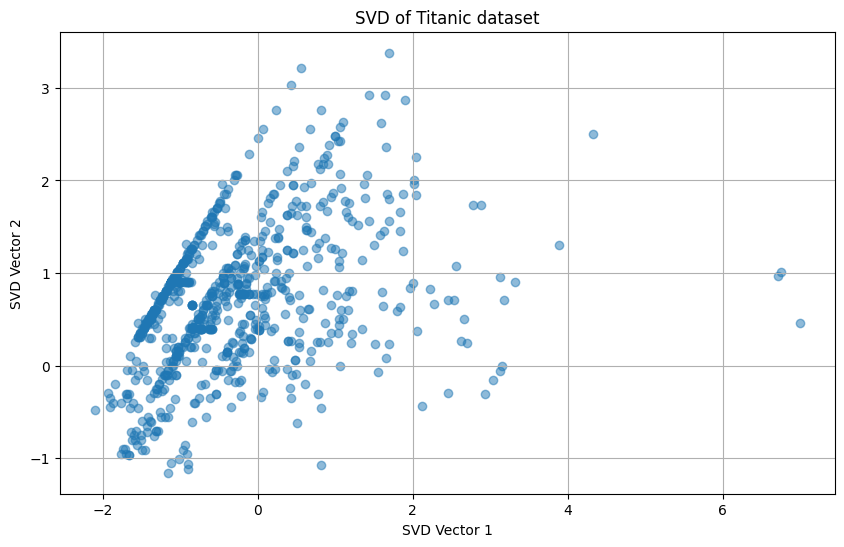

In [18]:
# asuume that Y is the result from svd with 2 results
plt.figure(figsize=(10,6))
plt.scatter(Y[:,0], Y[:,1], alpha=0.5)
plt.xlabel('SVD Vector 1')
plt.ylabel('SVD Vector 2')
plt.title('SVD of Titanic dataset')
plt.grid(True)
plt.show()

In [ ]:
# assume categors to be survied
surv = df['survived'].values
# asuume that Y is the result from svd with 2 results
plt.figure(figsize=(10,6))
scatter = plt.scatter(Y[:,0], Y[:,1], alpha=0.5, c=surv, cmap='viridis')
plt.xlabel('SVD Vector 1')
plt.ylabel('SVD Vector 2')
plt.title('SVD of Titanic dataset')
plt.legend(*scatter.legend_elements(),title = "Survived or Not")
plt.grid(True)
plt.show()